In [1]:
# code to study and make plot for NStation>1 efficiency wrt LLP hadronic energy
# only needed for region B

import ROOT as rt
import csv
import re
import sys
import collections

from collections import OrderedDict
import uproot
import pandas as pd
import os
import scipy
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

import CMS_lumi, tdrstyle
style = tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0

print(sys.version)

Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


# load ntuples

In [3]:
   
m = '55'
lumi = [ 35.9, 41.5, 59.7 ]
year='MC_Fall18'
masses = ['15','40','55','5']
m = '15'
analyzer = '74'
file = {}
tree = {}

# path = "/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/"+year+"/v2/v93/normalized/"
version = 'v114'
path = '/storage/cms/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18_FullGenParticles/v1/'+version+'/normalized/'

path = '/storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18_FullGenParticles/v1/v114/normalized/'



# file['4Tau_m7'] = path + 'ggH_HToSSTo4Tau_MH-125_MS-7.root'
# file['4Tau_m15'] = path + 'ggH_HToSSTo4Tau_MH-125_MS-15.root'
# file['4Tau_m40'] = path + 'ggH_HToSSTo4Tau_MH-125_MS-40.root'
# file['4Tau_m55'] = path + 'ggH_HToSSTo4Tau_MH-125_MS-55.root'


file['4Tau'] = path + 'ggH_HToSSTo4Tau_MH-125.root'

# path = '/storage/af/user/christiw/login-1/christiw/LLP/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18/v2/v119/normalized/'

# file['ggH_HToSS_STodd_ms3p0_pl500'] = path + 'ggH_HToSS_STodd_ms3p0_pl500_137000pb_weighted.root'
# file['ggH_HToSS_STodd_ms3p0_pl100'] = path + 'ggH_HToSS_STodd_ms3p0_pl500_137000pb_weighted.root'

# file['ggH_HToSS_SToGlueGlue_ms3p0_pl100'] = path + 'ggH_HToSS_SToGlueGlue_ms3p0_pl100_137000pb_weighted.root'
# file['ggH_HToSS_SToGlueGlue_ms3p0_pl500'] = path + 'ggH_HToSS_SToGlueGlue_ms3p0_pl500_137000pb_weighted.root'
# file['ggH_HToSS_SToPi0Pi0_ms0p4_pl10'] = path + 'ggH_HToSS_SToPi0Pi0_ms0p4_pl10_137000pb_weighted.root'
# file['ggH_HToSS_SToPi0Pi0_ms0p4_pl50'] = path + 'ggH_HToSS_SToPi0Pi0_ms0p4_pl50_137000pb_weighted.root'
# file['ggH_HToSS_SToPi0Pi0_ms1p0_pl125'] = path + 'ggH_HToSS_SToPi0Pi0_ms1p0_pl125_137000pb_weighted.root'
# file['ggH_HToSS_SToPi0Pi0_ms1p0_pl25'] = path + 'ggH_HToSS_SToPi0Pi0_ms1p0_pl25_137000pb_weighted.root'

# file['ggH_HToSS_SToEE_ms0p4_pl10'] = path + 'ggH_HToSS_SToEE_ms0p4_pl10_137000pb_weighted.root'
# file['ggH_HToSS_SToEE_ms0p4_pl50'] = path + 'ggH_HToSS_SToEE_ms0p4_pl50_137000pb_weighted.root'
# file['ggH_HToSS_SToEE_ms1p0_pl125'] = path + 'ggH_HToSS_SToEE_ms1p0_pl125_137000pb_weighted.root'
# file['ggH_HToSS_SToEE_ms1p0_pl25'] = path + 'ggH_HToSS_SToEE_ms1p0_pl25_137000pb_weighted.root'
# file['ggH_HToSS_SToEE_ms2p0_pl250'] = path + 'ggH_HToSS_SToEE_ms2p0_pl250_137000pb_weighted.root'
# file['ggH_HToSS_SToEE_ms2p0_pl50'] = path + 'ggH_HToSS_SToEE_ms2p0_pl50_137000pb_weighted.root'
# file['ggH_HToSS_SToEE_ms4p0_pl100'] = path + 'ggH_HToSS_SToEE_ms4p0_pl100_137000pb_weighted.root'
# file['ggH_HToSS_SToEE_ms4p0_pl500'] = path + 'ggH_HToSS_SToEE_ms4p0_pl500_137000pb_weighted.root'

# file['ggH_HToSS_SToGammaGamma_ms0p4_pl10'] = path + 'ggH_HToSS_SToGammaGamma_ms0p4_pl10_137000pb_weighted.root'
# file['ggH_HToSS_SToGammaGamma_ms0p4_pl50'] = path + 'ggH_HToSS_SToGammaGamma_ms0p4_pl50_137000pb_weighted.root'
# file['ggH_HToSS_SToGammaGamma_ms1p0_pl125'] = path + 'ggH_HToSS_SToGammaGamma_ms1p0_pl125_137000pb_weighted.root'
# file['ggH_HToSS_SToGammaGamma_ms1p0_pl25'] = path + 'ggH_HToSS_SToGammaGamma_ms1p0_pl25_137000pb_weighted.root'
# file['ggH_HToSS_SToGammaGamma_ms2p0_pl250'] = path + 'ggH_HToSS_SToGammaGamma_ms2p0_pl250_137000pb_weighted.root'
# file['ggH_HToSS_SToGammaGamma_ms2p0_pl50'] = path + 'ggH_HToSS_SToGammaGamma_ms2p0_pl50_137000pb_weighted.root'
# file['ggH_HToSS_SToGammaGamma_ms4p0_pl100'] = path + 'ggH_HToSS_SToGammaGamma_ms4p0_pl100_137000pb_weighted.root'
# file['ggH_HToSS_SToGammaGamma_ms4p0_pl500'] = path + 'ggH_HToSS_SToGammaGamma_ms4p0_pl500_137000pb_weighted.root'

# file['ggH_HToSS_SToPiPlusPiMinus_ms0p4_pl10'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms0p4_pl10_137000pb_weighted.root'
# file['ggH_HToSS_SToPiPlusPiMinus_ms0p4_pl50'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms0p4_pl50_137000pb_weighted.root'
# file['ggH_HToSS_SToPiPlusPiMinus_ms1p0_pl125'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms1p0_pl125_137000pb_weighted.root'
# file['ggH_HToSS_SToPiPlusPiMinus_ms1p0_pl25'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms1p0_pl25_137000pb_weighted.root'
# file['ggH_HToSS_SToPiPlusPiMinus_ms2p0_pl250'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms2p0_pl250_137000pb_weighted.root'
# file['ggH_HToSS_SToPiPlusPiMinus_ms2p0_pl50'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms2p0_pl50_137000pb_weighted.root'
# file['ggH_HToSS_SToPiPlusPiMinus_ms4p0_pl100'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms4p0_pl100_137000pb_weighted.root'
# file['ggH_HToSS_SToPiPlusPiMinus_ms4p0_pl500'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms4p0_pl500_137000pb_weighted.root'

# file['HNL'] = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18/v1/v73/normalized/HNL_testpoint1_137000pb_weighted.root'


for k, v in file.items():
    tree[k] = uproot.open(v)['MuonSystem']
    print(np.mean(tree[k].array('gLLP_ctau')))
    print(k,v)

686.4573
4Tau /storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18_FullGenParticles/v1/v114/normalized/ggH_HToSSTo4Tau_MH-125.root


# load branches

In [4]:
%%time
import uproot
import numpy as np
cut_based = True
cut_based_version='v4'
llp_r = {}
llp_z = {}
llp_e ={}
llp_pz = {}
llp_ez = {}
llp_p = {}
llp_gamma = {}
clusterR = {}
clusterZ = {}
clusterE = {}
clusterPz = {}
clusterEz = {}
clusterP = {}
clusterGamma = {}
clusterSize = {}
llp_emfracP = {}
llp_emfracPz = {}
llp_emfracE = {}
llp_emfracEz = {}
clusterEMFracP = {}
clusterEMFracPz = {}
clusterEMFracE = {}
clusterEMFracEz = {}
nCluster = {}

llp_EMP = {}
llp_EMPz = {}
llp_EME= {}
llp_EMEz= {}

llp_HadP= {}
llp_HadPz= {}
llp_HadE= {}
llp_HadEz= {}

clusterEMP= {}
clusterEMPz= {}
clusterEME= {}
clusterEMEz= {}

clusterHadP= {}
clusterHadPz= {}
clusterHadE= {}
clusterHadEz= {}
evtNum = {}
llp_visFracE= {}
cluster_visFracE={}
higgsPt_denom = {}
higgsPt_nom = {}
llp_ctau = {}
llp_multiplicity = {}
cluster_multiplicity = {}
weight_nom = {}
weight = {}
clusterme1112= {}
llp_eta = {}
cluster_llp_eta = {}
clusterEta = {}
re12 = {}
mb1 = {}
rb1 = {}
clusterZPos = {}

cscRechitClusterNStation10 = {}
cscRechitClusterEta = {}
cscRechitClusterAvgStation10 = {}
cut_based = {}

time= {}
timeSpread= {}
muonVeto= {}
jetVeto= {}
nCsc_cut = 50

for k, T in tree.items():
    sel_jet = np.logical_and(T.array('jetPt') > 50, np.abs(T.array('jetEta')) < 2.4 )
    ########### SELECTION: EVENTS ############

    
 
    sel_llp = np.abs(T.array('gLLP_eta'))<2.4
    sel_llp = np.logical_and(sel_llp, np.logical_and(T.array('gLLP_decay_vertex_r')< 695.5, np.abs(T.array('gLLP_decay_vertex_z')) < 1100))
#     sel_llp = np.logical_and(sel_llp, np.logical_and(np.abs(T.array('gLLP_eta'))> 0.9, np.abs(T.array('gLLP_decay_vertex_z')) > 680))
    sel_llp = np.logical_and(sel_llp,  np.abs(T.array('gLLP_decay_vertex_z')) > 400)


    sel_ev = np.sum(sel_llp, axis=1)==1
    
    sel_llp = sel_llp[sel_ev]

    


#     sel_ev = np.sum(T.array('gLLP_csc'),axis = 1) == 1
#     sel_llp = T.array('gLLP_csc')[sel_ev] == 1



#     sel_llp = np.logical_and(sel_llp, np.logical_and(T.array('gLLP_decay_vertex_r')[sel_ev]< 700, T.array('gLLP_decay_vertex_r')[sel_ev] > 400))
#     sel_llp = np.logical_and(sel_llp, np.logical_and(np.abs(T.array('gLLP_decay_vertex_z'))[sel_ev]< 850, np.abs(T.array('gLLP_decay_vertex_z'))[sel_ev] > 800))
    
    llp_r[k] = np.abs(T.array('gLLP_decay_vertex_r'))[sel_ev][sel_llp]
    llp_z[k] = np.abs(T.array('gLLP_decay_vertex_z'))[sel_ev][sel_llp]
    llp_ctau[k] = np.abs(T.array('gLLP_ctau'))[sel_ev][sel_llp]

    llp_eta[k] = np.abs(T.array('gLLP_eta'))[sel_ev][sel_llp]


    
    higgsPt_denom[k] = np.abs(T.array('gHiggsPt'))[sel_ev]


#     llp_gamma[k] = T.array('gLLP_e')[sel_ev][sel_llp]/int(m)

    if not '4Tau' in k and not '4d' in k:
        llp_e[k] = T.array('gLLP_e')[sel_ev][sel_llp]
        llp_ez[k] = np.abs(T.array('gLLP_e')[sel_ev][sel_llp]*np.sinh(T.array('gLLP_eta')[sel_ev][sel_llp])/np.cosh(T.array('gLLP_eta')[sel_ev][sel_llp]))
        llp_pz[k] = np.abs(T.array('gLLP_pt')[sel_ev][sel_llp]*np.sinh(T.array('gLLP_eta')[sel_ev][sel_llp]))
        llp_p[k] = np.abs(T.array('gLLP_pt')[sel_ev][sel_llp]*np.cosh(T.array('gLLP_eta')[sel_ev][sel_llp]))
    else:
        llp_e[k] = T.array('gLLP_visE')[sel_ev][sel_llp]
        llp_ez[k] = np.abs(T.array('gLLP_visEz')[sel_ev][sel_llp])
        llp_p[k] = np.abs(T.array('gLLP_visP')[sel_ev][sel_llp])
        llp_pz[k] = np.abs(T.array('gLLP_visPz')[sel_ev][sel_llp]) 
        llp_visFracE[k] = T.array('gLLP_visE')[sel_ev][sel_llp]/T.array('gLLP_e')[sel_ev][sel_llp]
    if '4d' in k or 'v2' in k: llp_multiplicity[k] =  T.array('gLLP_multiplicity')[sel_ev][sel_llp]
    if '4b' in k:
        llp_HadP[k] = llp_p[k]
        llp_HadPz[k] = llp_pz[k]
        llp_HadE[k] = llp_e[k]
        llp_HadEz[k] = llp_ez[k]

        llp_emfracP[k] = llp_HadP[k]*0.0
        llp_emfracPz[k] = llp_HadP[k]*0.0
        llp_emfracE[k] = llp_HadP[k]*0.0
        llp_emfracEz[k] = llp_HadP[k]*0.0
    
        llp_EMP[k] = llp_HadP[k]*0.0
        llp_EMPz[k] = llp_HadPz[k]*0.0
        llp_EME[k] = llp_HadE[k]*0.0
        llp_EMEz[k] = llp_HadEz[k]*0.0
    elif 'GlueGlue' in k or 'STodd' in k or 'SToPiPlusPiMinus' in k:

        llp_HadP[k] = llp_p[k]
        llp_HadPz[k] = llp_pz[k]
        llp_HadE[k] = llp_e[k]
        llp_HadEz[k] = llp_ez[k]

        llp_emfracP[k] = llp_HadP[k]*0.0
        llp_emfracPz[k] = llp_HadP[k]*0.0
        llp_emfracE[k] = llp_HadP[k]*0.0
        llp_emfracEz[k] = llp_HadP[k]*0.0
    
        llp_EMP[k] = llp_HadP[k]*0.0
        llp_EMPz[k] = llp_HadPz[k]*0.0
        llp_EME[k] = llp_HadE[k]*0.0
        llp_EMEz[k] = llp_HadEz[k]*0.0
    elif 'SToEE' in k or 'SToPi0Pi0' in k or 'Gamma' in k:
        llp_EMP[k] = llp_p[k]
        llp_EMPz[k] = llp_pz[k]
        llp_EME[k] = llp_e[k]
        llp_EMEz[k] = llp_ez[k]

        llp_emfracP[k] = llp_EMP[k]*1.0
        llp_emfracPz[k] = llp_EMP[k]*1.0
        llp_emfracE[k] = llp_EMP[k]*1.0
        llp_emfracEz[k] = llp_EMP[k]*1.0
    
        llp_HadP[k] = llp_EMP[k]*0.0
        llp_HadPz[k] = llp_EMP[k]*0.0
        llp_HadE[k] = llp_EMP[k]*0.0
        llp_HadEz[k] = llp_EMP[k]*0.0
    
    else:
        llp_emfracP[k] = T.array('gLLP_EMFracP')[sel_ev][sel_llp]
        llp_emfracPz[k] = T.array('gLLP_EMFracPz')[sel_ev][sel_llp]
        llp_emfracE[k] = T.array('gLLP_EMFracE')[sel_ev][sel_llp]
        llp_emfracEz[k] = T.array('gLLP_EMFracEz')[sel_ev][sel_llp]
    
        llp_EMP[k] = llp_emfracP[k]*llp_p[k]
        llp_EMPz[k] = llp_emfracPz[k]*llp_pz[k]
        llp_EME[k] = llp_emfracE[k]*llp_e[k]
        llp_EMEz[k] = llp_emfracEz[k]*llp_ez[k]

        llp_HadP[k] = llp_p[k]-llp_EMP[k]
        llp_HadPz[k] = llp_pz[k]-llp_EMPz[k]
        llp_HadE[k] = llp_e[k]-llp_EME[k]
        llp_HadEz[k] = llp_ez[k]-llp_EMEz[k]

    evtNum[k] = T.array('evtNum')[sel_ev]
    weight[k] = T.array('weight')[sel_ev]
    cluster_index = '3'

    ########### SELECTION: CLUSTERS ############

    sel_rechitcluster = np.abs(T.array('cscRechitCluster'+cluster_index+'_match_gLLP_eta'))< 2.4

    sel_rechitcluster = np.logical_and(sel_rechitcluster, np.logical_and(np.abs(T.array('cscRechitCluster'+cluster_index+'_match_gLLP_decay_r')) < 695.5, \
                                                                         np.abs(T.array('cscRechitCluster'+cluster_index+'_match_gLLP_decay_z')) < 1100))
    sel_rechitcluster = np.logical_and(sel_rechitcluster,np.abs(T.array('cscRechitCluster'+cluster_index+'_match_gLLP_decay_z'))> 400)
    sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster'+cluster_index+'Size')>=nCsc_cut)


    nCluster[k] = sel_rechitcluster.sum()[sel_ev]
    sel_ev = np.logical_and(sel_ev,sel_rechitcluster.sum()==1)
    higgsPt_nom[k] = np.abs(T.array('gHiggsPt'))[sel_ev]
    weight_nom[k] = T.array('weight')[sel_ev]


    clusterR[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_decay_r'))[sel_rechitcluster][sel_ev].flatten()
    clusterZ[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_decay_z'))[sel_rechitcluster][sel_ev].flatten()
    clusterZPos[k] = np.abs(T.array('cscRechitCluster' + cluster_index + 'Z'))[sel_rechitcluster][sel_ev].flatten()


    cluster_llp_eta[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_eta'))[sel_rechitcluster][sel_ev].flatten()
    clusterEta[k] = np.abs(T.array('cscRechitCluster' + cluster_index + 'Eta'))[sel_rechitcluster][sel_ev].flatten()



    clusterSize[k] = T.array('cscRechitCluster' + cluster_index + 'Size')[sel_rechitcluster][sel_ev].flatten()


    
    clusterme1112[k] =  (T.array('cscRechitCluster'+cluster_index+'NRechitChamberPlus11')+\
         T.array('cscRechitCluster'+cluster_index+'NRechitChamberPlus12') +\
        T.array('cscRechitCluster'+cluster_index+'NRechitChamberMinus11')+\
        T.array('cscRechitCluster'+cluster_index+'NRechitChamberMinus12'))[sel_rechitcluster][sel_ev].flatten()
    
    re12[k] = T.array('cscRechitCluster' + cluster_index + '_match_RE12_0p4')[sel_rechitcluster][sel_ev].flatten()
    mb1[k] = T.array('cscRechitCluster' + cluster_index + '_match_MB1Seg_0p4')[sel_rechitcluster][sel_ev].flatten()
    rb1[k] =  T.array('cscRechitCluster' + cluster_index + '_match_RB1_0p4')[sel_rechitcluster][sel_ev].flatten()
    time[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeTotal')[sel_rechitcluster][sel_ev].flatten()
    timeSpread[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeSpread')[sel_rechitcluster][sel_ev].flatten()
    muonVeto[k] =  T.array('cscRechitCluster' + cluster_index + 'MuonVetoPt')[sel_rechitcluster][sel_ev].flatten()
    jetVeto[k] =  T.array('cscRechitCluster' + cluster_index + 'JetVetoPt')[sel_rechitcluster][sel_ev].flatten()
    if not '4Tau' in k and not '4d' in k:

        clusterE[k] = T.array('cscRechitCluster' + cluster_index + '_match_gLLP_e')[sel_rechitcluster][sel_ev].flatten()
        clusterPz[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_pt')[sel_rechitcluster][sel_ev].flatten()\
                              *np.sinh(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_eta')[sel_rechitcluster][sel_ev].flatten()))
        clusterP[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_pt')[sel_rechitcluster][sel_ev].flatten()\
                              *np.cosh(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_eta')[sel_rechitcluster][sel_ev].flatten()))
        clusterEz[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_e')[sel_rechitcluster][sel_ev].flatten()\
                              *np.sinh(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_eta')[sel_rechitcluster][sel_ev].flatten())\
                              /np.cosh(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_eta')[sel_rechitcluster][sel_ev].flatten()))

    else:#only for 4tau
        clusterE[k] = T.array('cscRechitCluster' + cluster_index + '_match_gLLP_visE')[sel_rechitcluster][sel_ev].flatten()
        clusterPz[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_visPz')[sel_rechitcluster][sel_ev].flatten())
        clusterP[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_visP')[sel_rechitcluster][sel_ev].flatten())
        clusterEz[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_visEz')[sel_rechitcluster][sel_ev].flatten())
   

        cluster_visFracE[k] = clusterE[k]/T.array('cscRechitCluster' + cluster_index + '_match_gLLP_e')[sel_rechitcluster][sel_ev].flatten()

    if '4d' in k or 'v2' in k: cluster_multiplicity[k] =  np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_multiplicity')[sel_rechitcluster][sel_ev].flatten())


    if '4b' in k:

        clusterEMFracP[k] = clusterP[k]*0.0
        clusterEMFracPz[k] = clusterP[k]*0.0
        clusterEMFracE[k] = clusterP[k]*0.0
        clusterEMFracEz[k] = clusterP[k]*0.0

        clusterEMP[k] = clusterP[k]*0.0
        clusterEMPz[k] = clusterP[k]*0.0
        clusterEME[k] = clusterP[k]*0.0
        clusterEMEz[k] = clusterP[k]*0.0

        clusterHadP[k] = clusterP[k]
        clusterHadPz[k] = clusterPz[k]
        clusterHadE[k] = clusterE[k]
        clusterHadEz[k] = clusterEz[k]
    elif 'SToEE' in k or 'SToPi0Pi0' in k or 'Gamma' in k:
        clusterEMFracP[k] = clusterP[k]*1.0
        clusterEMFracPz[k] = clusterP[k]*1.0
        clusterEMFracE[k] = clusterP[k]*1.0
        clusterEMFracEz[k] = clusterP[k]*1.0

        clusterEMP[k] = clusterP[k]
        clusterEMPz[k] = clusterPz[k]
        clusterEME[k] = clusterE[k]
        clusterEMEz[k] = clusterEz[k]

        clusterHadP[k] = clusterP[k]*0.0
        clusterHadPz[k] = clusterPz[k]*0.0
        clusterHadE[k] = clusterE[k]*0.0
        clusterHadEz[k] = clusterEz[k]*0.0
    elif 'GlueGlue' in k or 'STodd' in k or 'SToPiPlusPiMinus' in k:
        clusterEMFracP[k] = clusterP[k]*0.0
        clusterEMFracPz[k] = clusterP[k]*0.0
        clusterEMFracE[k] = clusterP[k]*0.0
        clusterEMFracEz[k] = clusterP[k]*0.0

        clusterEMP[k] = clusterP[k]*0.0
        clusterEMPz[k] = clusterP[k]*0.0
        clusterEME[k] = clusterP[k]*0.0
        clusterEMEz[k] = clusterP[k]*0.0

        clusterHadP[k] = clusterP[k]
        clusterHadPz[k] = clusterPz[k]
        clusterHadE[k] = clusterE[k]
        clusterHadEz[k] = clusterEz[k]
    else:
        clusterEMFracP[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_EMFracP'))[sel_rechitcluster][sel_ev].flatten()
        clusterEMFracPz[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_EMFracPz'))[sel_rechitcluster][sel_ev].flatten()
        clusterEMFracE[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_EMFracE'))[sel_rechitcluster][sel_ev].flatten()
        clusterEMFracEz[k] = np.abs(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_EMFracEz'))[sel_rechitcluster][sel_ev].flatten()


        clusterEMP[k] = clusterEMFracP[k]*clusterP[k]
        clusterEMPz[k] = clusterEMFracPz[k]*clusterPz[k]
        clusterEME[k] = clusterEMFracE[k]*clusterE[k]
        clusterEMEz[k] = clusterEMFracEz[k]*clusterEz[k]

        clusterHadP[k] = clusterP[k]-clusterEMP[k]
        clusterHadPz[k] = clusterPz[k]-clusterEMPz[k]
        clusterHadE[k] = clusterE[k]-clusterEME[k]
        clusterHadEz[k] = clusterEz[k]-clusterEMEz[k]
    print(k)
        
    cscRechitClusterNStation10[k] = T.array('cscRechitCluster' + cluster_index + 'NStation10')[sel_rechitcluster][sel_ev].flatten()
    cscRechitClusterEta[k] = T.array('cscRechitCluster' + cluster_index + 'Eta')[sel_rechitcluster][sel_ev].flatten()
    cscRechitClusterAvgStation10[k] = T.array('cscRechitCluster' + cluster_index + 'AvgStation10')[sel_rechitcluster][sel_ev].flatten()
    
    cond2 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==2, np.abs(cscRechitClusterEta[k]) < 1.6)
    cond3 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==3, np.abs(cscRechitClusterEta[k]) < 1.6)
    cond4 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==4, np.abs(cscRechitClusterEta[k]) < 1.8)
    cond1 = np.logical_and(cscRechitClusterNStation10[k]==1, np.logical_or(np.logical_or(np.abs(cscRechitClusterAvgStation10[k])==1, cond2), np.logical_or(cond3, cond4)))
    cond2 = np.logical_and(cscRechitClusterNStation10[k] > 1, np.abs(cscRechitClusterEta[k]) < 1.9)
    cut_based[k] = np.logical_or(np.logical_or(cond1, cond2), np.logical_or(cond3, cond4))
    

4Tau
CPU times: user 45 s, sys: 2.85 s, total: 47.8 s
Wall time: 1min 2s


### only NStation>1 Efficiency for region B is needed

# NStation>1 Efficiency wrt Different Variables

4Tau
ggH_HToSS_SToEE_ms0p4_pl10
ggH_HToSS_SToEE_ms0p4_pl50
ggH_HToSS_SToEE_ms1p0_pl125
ggH_HToSS_SToEE_ms1p0_pl25
ggH_HToSS_SToEE_ms2p0_pl250
ggH_HToSS_SToEE_ms2p0_pl50
ggH_HToSS_SToEE_ms4p0_pl500


Warning in <TROOT::Append>: Replacing existing TH1: l (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: l (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: l (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: l (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: l (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: l (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: l (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: l (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: l (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: l (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: l (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: l (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 

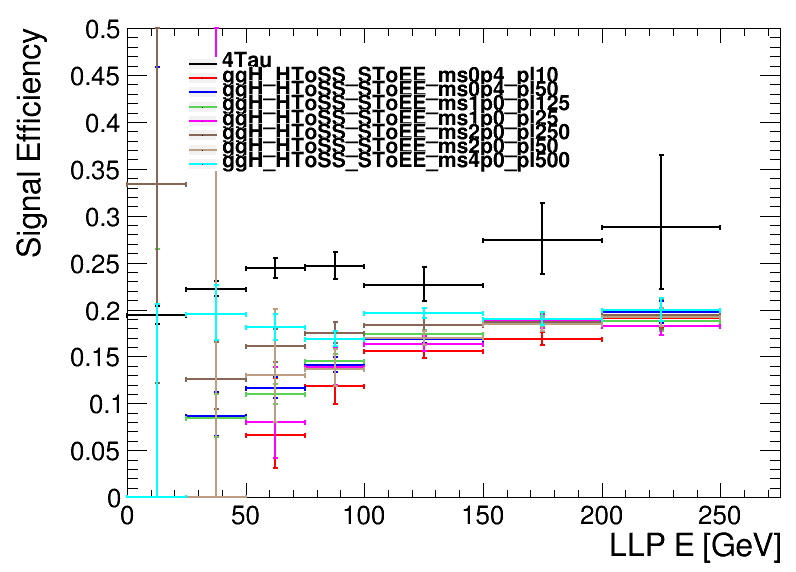

In [4]:
# used to study efficiency behavior and generated Figure 82 in Appendix F of AN_19-154


nominator = [clusterR,clusterZ,clusterE,clusterPz,clusterEz,clusterGamma, clusterP, clusterEMFracP, clusterEMFracPz, clusterEMFracE, clusterEMFracEz,\
            clusterEMP,clusterEMPz, clusterEME, clusterEMEz,clusterHadP,clusterHadPz,clusterHadE,clusterHadEz,cluster_visFracE, higgsPt_nom, cluster_multiplicity]
bins = [[60,0,700], [70, 400, 1275], [0, 25,50,75,100,150,200,250], [25,0,500],[25,0,500],[25,0,100],[0, 25,50,75,100,150,200,250],[25,0,1], [25,0,1], [100,0,1], [25,0,1],\
       [25,0,500], [25,0,500], [0,25,50,75,100,125,150, 200], [25,0,500],[25,0,500], [25,0,500], [0,25,50,75,100,150,200,250], [25,0,500],[20,0,1],[50,0,2000],[100,0,100]]

xaxis = ['LLP decay R [cm]','LLP decay Z [cm]','LLP E [GeV]','LLP p_{Z} [GeV]','LLP Ez [GeV]','LLP #gamma','LLP p [GeV]','EM P fraction', \
         'EM Pz fraction', 'EM E fraction', 'EM Ez fraction','EM P', 'EM Pz', 'EM E', 'EM Ez','Had P', 'Had Pz', 'Hadronic Energy [GeV]', 'Had Ez','visible energy fraction','higgsPt','multiplicity']
assert(len(nominator)==len(bins)==len(xaxis))

index = 2


hm = {}
hb = {}
pEff = {}

c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.60,0.15, 0.85,0.35)
leg.SetTextSize(0.04)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
j = 0
target_m = '4d_m15'
nCsc_cut = 130


for i, m in enumerate(tree.keys()):

#     if not '4Tau_m' in m:continue #ctau independence
#     if not '4Tau_m' in m or '10' in m:continue #mass independence
#     if 'm' in m:continue #mass independence

    if not 'EE' in m and not '4Tau' in m:continue
    if 'ggH_HToSS_SToEE_ms4p0_pl100' in m:continue



    region = 'b'
  
    cond_b = np.abs(clusterZ[m])>671 # region B definition
    
    # condition for after all vetos, nominator in cluster efficiency
    cond_b = np.logical_and(cond_b, np.abs(cluster_llp_eta[m])<2)
    cond_b = np.logical_and(cond_b, np.abs(clusterEta[m])<2)
    cond_b= np.logical_and(cond_b, clusterme1112[m]==0)
    cond_b= np.logical_and(cond_b, re12[m]==0)
    cond_b= np.logical_and(cond_b, rb1[m]==0)
    cond_b= np.logical_and(cond_b, mb1[m]==0)
    cond_b= np.logical_and(cond_b, timeSpread[m]<20)
    cond_b= np.logical_and(cond_b, muonVeto[m]<20)
    cond_b= np.logical_and(cond_b, clusterSize[m]>=nCsc_cut)
#     cond_b = np.logical_and(cond_b, clusterHadE[m] == 0.0)
    
    cond = np.logical_and(cond_b,cscRechitClusterNStation10[m]>1)


    hm[m] = create_TH1D(np.abs(nominator[index][m][cond]), 'l', axis_title = [xaxis[index],'Signal Efficiency'], binning=bins[index])
    hb[m] = create_TH1D(np.abs(nominator[index][m][cond_b]), 'l', axis_title = [xaxis[index],'Signal Efficiency'], binning=bins[index])
    pEff[m] = rt.TEfficiency(hm[m],hb[m])


    
    # when plotting efficiency vs. hadronic energy, convert to histogram, for the plots in Appendix F in AN-19-154
    # need this conversion to show the 0 hadronic energy bin
    if index == 17:
        eff_hist[m] = create_TH1D(np.abs(nominator[index][m][cond]), '',axis_title = [xaxis[index],'Signal Efficiency'], binning= [0,25,50,75,100,150,200,250])
        pEff[m] = rt.TEfficiency(eff_hist[m],eff_hist[m])
        for x in range(1, eff_hist[m].GetXaxis().GetNbins()+1):
            for y in range(1, eff_hist[m].GetYaxis().GetNbins()+1):
                global_bin = pEff[m].GetGlobalBin(x,y)
                pEff[m].SetPassedEvents(global_bin, 0)
                pEff[m].SetTotalEvents(global_bin,  100000)
                pEff[m].SetPassedEvents(global_bin, int(hm[m].GetBinContent(x,y)))
                pEff[m].SetTotalEvents(global_bin,  int(hb[m].GetBinContent(x,y)))
#                 eff_hist[m].SetBinContent(x,y,pEff[m].GetEfficiency(pEff[m].GetGlobalBin(x,y)))
#                 eff_hist[m].SetBinError(x,y,max(pEff[m].GetEfficiencyErrorLow(pEff[m].GetGlobalBin(x,y)),pEff[m].GetEfficiencyErrorUp(pEff[m].GetGlobalBin(x,y))))
#         eff_hist[m].SetMaximum(1.0)
#         eff_hist[m].SetMinimum(0.0)



    pEff[m].SetLineColor(std_color_list[j])
    pEff[m].SetLineWidth(2)
    pEff[m].SetMarkerSize(0)
    leg.AddEntry(pEff[m],m)



    pEff[m].Draw('' if j == 0 else 'same')



    j+=1

c.Draw()
leg.Draw()



pEff[list(pEff.keys())[0]].GetPaintedGraph().GetHistogram().SetMaximum(0.5)
pEff[list(pEff.keys())[0]].GetPaintedGraph().GetHistogram().SetMinimum(0.0)







# NStation>1 Efficiency (Additional Figure 8)

### make plot pdf

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: 4Tau_b (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 4Tau_b (Potential memory leak).


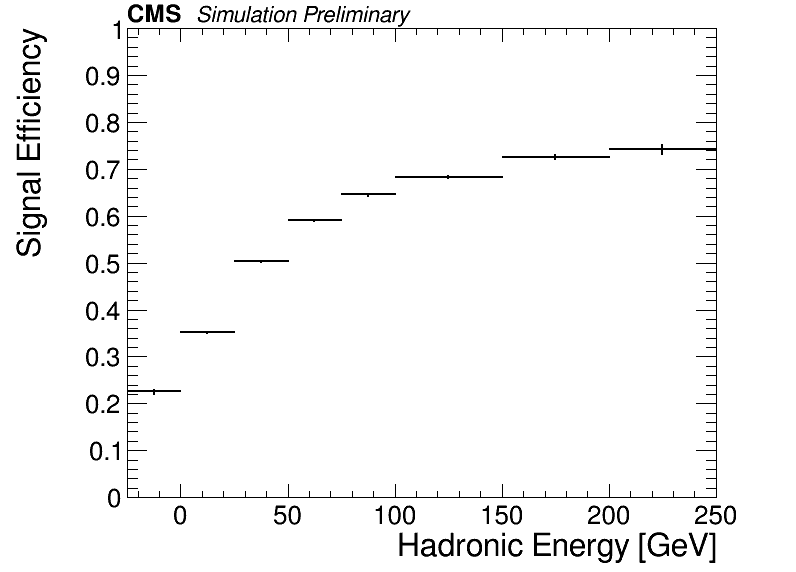

In [9]:
nominator = clusterHadE
bins = [0,0,25,50,75,100,150,200,250]
bins_plot = [-25,0,25,50,75,100,150,200,250]
xaxis = 'Hadronic Energy [GeV]'


index = 0
hm = {}
hb = {}
pEff = {}
eff_hist = {}
eff_histUp = {}
eff_histDown = {}
c = rt.TCanvas('c','c', 800, 600)


nCsc_cut = 130
for i,m in enumerate(tree.keys()):
    if not m =='4Tau':continue
    for region in ['a','b','c']:
        if not region == 'b':continue
        key = m+'_'+region
       
        condb = np.abs(clusterZ[m])>671

        condb = np.logical_and(condb, np.abs(cluster_llp_eta[m])<2)
        condb = np.logical_and(condb,np.abs(clusterEta[m])<2)
        condb= np.logical_and(condb, clusterme1112[m]==0)
        condb= np.logical_and(condb, re12[m]==0)
        condb= np.logical_and(condb, rb1[m]==0)
        condb= np.logical_and(condb, mb1[m]==0)
        condb= np.logical_and(condb, mb1[m]==0)
        condb= np.logical_and(condb, mb1[m]==0)
        condb= np.logical_and(condb, timeSpread[m]<20)
        condb= np.logical_and(condb, muonVeto[m]<20)
        condb= np.logical_and(condb, clusterSize[m]>=nCsc_cut)

        condm = np.logical_and(condb, cscRechitClusterNStation10[m]>1)


        hm[key] = create_TH1D(nominator[m][condm], m+'_'+region,axis_title = [xaxis,'Signal Efficiency'], binning=bins)
        hb[key] = create_TH1D(nominator[m][condb], m+'_'+region, axis_title = [xaxis,'Signal Efficiency'], binning=bins)
        
        # they are just empty histograms, all bin contents will be replaced in the for loop below
        eff_hist[key] = create_TH1D(nominator[m][condm], m+'_'+region, axis_title = [xaxis,'Signal Efficiency'], binning=bins_plot, weights = weight_nom[m][condm])
        eff_histUp[key] = eff_hist[key].Clone()
        eff_histDown[key] = eff_hist[key].Clone()
        

        pEff[key] = rt.TEfficiency(hm[key],hb[key])

        for x in range(1, eff_hist[key].GetXaxis().GetNbins()+1):
            eff_hist[key].SetBinContent(x,pEff[key].GetEfficiency(x))
            eff_hist[key].SetBinError(x,max(pEff[key].GetEfficiencyErrorLow(x),pEff[key].GetEfficiencyErrorUp(x)))
            eff_histUp[key].SetBinContent(x,pEff[key].GetEfficiencyErrorUp(x))
            eff_histDown[key].SetBinContent(x,pEff[key].GetEfficiencyErrorLow(x))

        eff_hist[key].SetMaximum(1.0)
        eff_hist[key].SetMinimum(0.0)
        eff_hist[key].Draw('')

        CMS_lumi.cmsText     = "CMS"
        iPos = 0
        CMS_lumi.writeExtraText = 1
        CMS_lumi.extraText   = "Simulation Supplementary"
        CMS_lumi.extraText   = "Simulation Preliminary"


        if( iPos==0 ): CMS_lumi.relPosX = 0.1
        CMS_lumi.CMS_lumi(c, 0, 0)
        c.SetRightMargin(0.1)
        c.Draw()
        outDir = '/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/supplementary/cut_based_id/'+version+'/'
        file_name = outDir+m+'_region'+region.capitalize()+'nRechits'+str(nCsc_cut)
        
        if CMS_lumi.writeExtraText and CMS_lumi.extraText == 'Simulation Preliminary': file_name += "_pas"
        if CMS_lumi.writeExtraText and CMS_lumi.extraText == 'Simulation Supplementary': file_name += "_supplementary"
            
        c.SaveAs(file_name + '.png')
        c.SaveAs(file_name + '.pdf')
        c.SaveAs(file_name + '.C')
rt.gPad.Update()


### save plot to ROOT file (needed for HEPData entry tarball)

In [50]:
outputFileName = '/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/supplementary/'+version+'/cutbasedID_eff_'+str(nCsc_cut)+'.root'
if os.path.exists(outputFileName):outFile = rt.TFile(outputFileName, 'UPDATE')
else:outFile = rt.TFile(outputFileName, 'RECREATE')
print(outputFileName)
for m in eff_hist.keys():
    if not '4Tau' in m:continue
    outFile.WriteTObject(eff_hist[m], 'h_'+m, 'WriteDelete')
    outFile.WriteTObject(eff_histUp[m], 'h_'+m+'Up', 'WriteDelete')
    outFile.WriteTObject(eff_histDown[m], 'h_'+m+'Down', 'WriteDelete')
    print(m)
outFile.Close()

/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/supplementary/v114/cutbasedID_eff_130.root
4Tau_a
4Tau_b
4Tau_c
